$\mathbf{Notes}$:

Variables:
P, T, $L_r$, $M_r=M(<r)$


$P = P_{gas}(\rho)+ P_{rad}$

where $P_{rad}= aT^3/3$
\begin{align}
f\rightarrow \frac{d}{dr}(M_r, L_r, T, P)
\end{align}

other var:
$ \rho(y,r), \epsilon, \kappa$

use: average $\kappa$, sum $\epsilon$

Bound-free:
\begin{align}
\bar{\kappa}_{bf} = 4.34 \times 10^{25} \frac{g_{bf}}{t}Z(1+X) \frac{\rho}{\rm g/cm^3} \left(\frac{T}{\rm K}\right)^{-7/2} {\rm \, cm^2 \, g^{-1}}
\end{align}

Free-free:
\begin{align}
\bar{\kappa}_{ff} = 3.68 \times 10^{22} g_{ff}(1 - Z)(1 + X) \frac{\rho}{\rm g/cm^3} \left(\frac{T}{\rm K}\right)^{-7/2} {\rm \, cm^2 \, g^{-1}}.
\end{align}

Electron-scattering:
\begin{align}
\bar{\kappa}_{es} = 0.2 (1+X) {\rm \, cm^2 \, g^{-1}}
\end{align}







# Problem 1

# (a)-(d)

By definition:
\begin{align}
M_r=\rho \frac{4\pi}{3}r^3\\
L = \epsilon \rho \frac{4\pi}{3} r^3
\end{align}

\begin{align}
dM_r = 4\pi\rho r^2 dr\\
dL_r = 4\pi\rho\epsilon r^2 dr\\
\end{align}

Hence we have:

\begin{align}
dM_r = 4\pi\rho r^2 dr\\
dL_r = 4\pi\rho\epsilon r^2 dr\\
\end{align}

That is:


\begin{align}
\dfrac{dM_r}{dr} &= 4\pi r^2\rho_{(P,T)}\\
\dfrac{dP}{dr} &= -\,\frac{GM_r\rho}{r^2}\\
\dfrac{dL}{dr} &= 4\pi r^2 \rho\epsilon\\
\dfrac{dT}{dr} &= -\frac{3}{4ac}\frac{\kappa\rho}{T^3}\frac{L_r}{4\pi r^2}
\end{align}

# (e)

For boundary conditions,
we know that: $M_0=0$, $L_0=0$, and from the data provided: $T_c$, $P_c$


And we will check: $M(r=R) = M_\odot
$, $L(r=R)= L_\odot$ later.


\begin{align}
M(r=0) &= 0\\
L(r=0) &= 0\\
T(r=0) &= T_c = 15.6 \cdot 10^6 \,K\\
P(r=0) &= P_c = 2.3 \cdot 10^{16} \,Pa\\
\rho(r=0) &= \rho_c = 1.51 \cdot 10^{5} \,kg\,m^{-3}
\end{align}



To get a better approximation, we may also start from $r_0 = 0.1R_\odot$
\begin{align}
M(r=r_0) &= M_0 = 0.08\,M_\odot \\
L(r=r_0) &= L_0 = 0.4\,L_\odot \\
T(r=r_0) &= T_0 = 13 \cdot 10^6K\\
P(r=r_0) &= P_0 = 1 \cdot 10^{16}Pa\\
\rho(r=r_0) &= \rho_0 = 1.0 \cdot 10^{5} \,kg\,m^{-3}
\end{align}

Blackbody radiation temperature:

$T_\odot = 5500 k$
   

# (f)

We can start from somewhere near the center. Then take the values of that position as the initial values.

# (h)

In [66]:
%matplotlib inline

from astropy import constants as cn
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


X=0.7
Y=0.28
Z=0.02
mu = 1./(2*X + 3*Y/4. + Z/2.)
#consts
m_H = 1.08 * cn.u.value #kg
M_sun = cn.M_sun.value  #kg
L_sun = cn.L_sun.value
R_sun = cn.R_sun.value  #m
a = 4*cn.sigma_sb.value/cn.c.value

#Center
Mc = 0
Lc = 0
Tc = 15.6 * pow(10,6) #K
Pc = 2.3 * pow(10,16) #Pa
rhoc = 1.51 * pow(10,5)  #kg m^{-3}

#r0=0.1R_sun
M0 = 0.08*M_sun
L0 = 0.4*L_sun
T0 = 13 * pow(10,6) #K
P0 = pow(10,6) #Pa
rho0 = pow(10,5)  #kg m^{-3}







In [73]:
def rho(y):
    Mr, Lr, T, P = y
    rho = (P - a*T**4/3) * mu / (cn.k_B.value / m_H) / T
    return rho

def epsilon(y):
    Mr, Lr, T, P = y
    e_0pp = 1.09 * pow(10, -12) 
    e_0CNO = 8.24 * pow(10, -31)
    X_H = 0.64
    X_CNO = 0.015
    rho0 = rho(y)
    e_pp = e_0pp * rho0 * (X_H **2) * pow(T/pow(10,6),4)
    e_CNO = e_0CNO * rho0 * X_H * X_CNO * pow(T/pow(10,6),19.9)
    return (e_pp + e_CNO)


## Classic Approx. for g_bf, g_ff
## random guess t
def kappa(y):
    g_bf = 1.
    g_ff = 1. 
    t = 100
    Mr, Lr, T, P = y
    rho0 = rho(y)
    X=0.7
    Y=0.28
    Z=0.02
    k_bf = 4.34 * pow(10,25) * g_bf/t * Z * (1+X) * rho0
    k_ff = 3.68 * pow(10,22) * g_ff * (1 - Z)*(1 + X) * rho0
    k_es = 0.2 * (1+X)
    return (k_bf + k_ff + k_es)/3.

In [74]:
def dMdr(y,r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    dmdr0 = 4.0 * np.pi * np.power(r,2) * rho0
    return dmdr0

def dPdr(y,r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    dpdr0 = -cn.G.value*Mr*rho0/r**2
    return dpdr0


def dLdr(y,r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    dldr0 = 4. * np.pi * pow(r,2) * rho0 * epsilon(y)
    return dldr0

def dTdr(y,r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    dtdr0 = -3. * kappa(y) * rho0 * Lr / (16. * cn.sigma_sb.value * pow(T,3) * 4. * np.pi * pow(r,2))
    return dtdr0


Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.


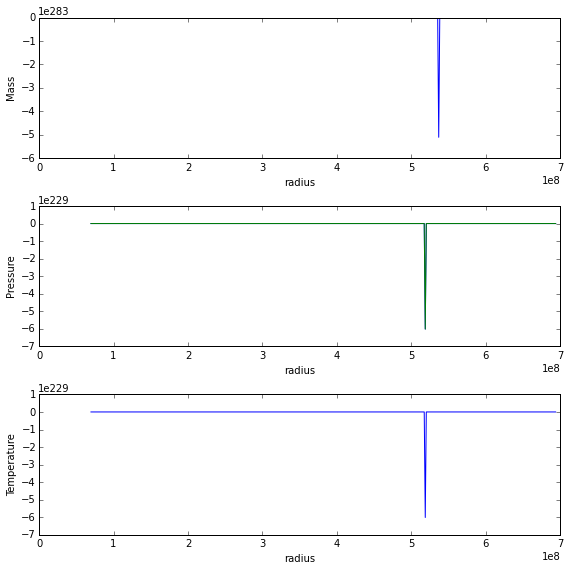

In [75]:
def f(y, r):
    Mr, Lr, T, P = y
    derivs = [dMdr(y,r), dPdr(y,r), dLdr(y,r), dTdr(y,r)]
    return derivs


##Initial Condition
##Center
yc = Mc, Lc, Tc, Pc
##0.1R_sun
y0 = M0, L0, T0, P0




rStop = R_sun
rInc = R_sun/500.
r0 = np.arange(0.1*R_sun, rStop, rInc)
rc = np.arange(0., rStop, rInc)


psoln = odeint(f, y0, r0)


fig = plt.figure(1, figsize=(8,8))


ax1 = fig.add_subplot(311)
ax1.plot(r0, psoln[:,0])
ax1.set_xlabel('radius')
ax1.set_ylabel('Mass')


ax2 = fig.add_subplot(312)
ax2.plot(r0, psoln[:,1])
ax2.set_xlabel('radius')
ax2.set_ylabel('Luminosity')

ax3 = fig.add_subplot(313)
ax3.plot(r0, psoln[:,1])
ax3.set_xlabel('radius')
ax3.set_ylabel('Temperature')

ax4 = fig.add_subplot(312)
ax4.plot(r0, psoln[:,1])
ax4.set_xlabel('radius')
ax4.set_ylabel('Pressure')



plt.tight_layout()
plt.show()
